# Let's begin


Loading the libraries is done

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
    

# Any results you write to the current directory are saved as output.

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/gender_submission.csv
/kaggle/input/titanic/test.csv


Train data is viewed using .head() in pandas

In [2]:
train_data = pd.read_csv("/kaggle/input/titanic/train.csv")
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


To check the length of datasets

In [3]:
print(train_data.shape)

(891, 12)


In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
test_data = pd.read_csv("/kaggle/input/titanic/test.csv")
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


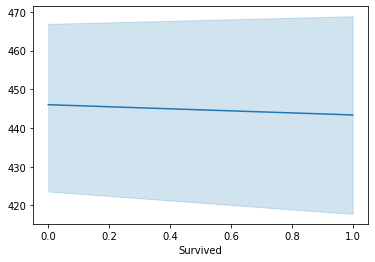

In [6]:
sns.lineplot(x=train_data['Survived'], y=train_data.index)

In [7]:
test_data.shape

(418, 11)

In [8]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


# Missing values
you would have obsereved that certain values were either null or NaN so now let's see what proportion of them are there in training and test dataset

In [9]:
# Check for missing values
missing_data=train_data.isnull().sum()
missing_data

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

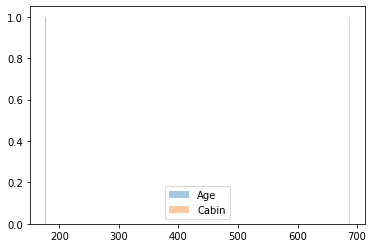

In [10]:
sns.distplot(a=missing_data['Age'], label='Age',kde=False)
sns.distplot(a=missing_data['Cabin'], label= 'Cabin',kde=False)
plt.legend()

In [11]:
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

Name, Sex, Cabin & Embarked are categorical. Remove Name & Ticket as they are irrelavant. Remove cabin as too many null values. You can also use pipelines or SimpleImputer

In [12]:
# Name, Sex, Cabin & Embarked are categorical. Remove Name & Ticket as they are irrelavant. Remove cabin as too many null values.
train_data.drop(['Name','Ticket','Cabin'],axis=1,inplace=True)
test_data.drop(['Name','Ticket','Cabin'],axis=1,inplace=True)

In [13]:
train_data.isnull().sum()
train_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [14]:
test_data.isnull().sum()

PassengerId     0
Pclass          0
Sex             0
Age            86
SibSp           0
Parch           0
Fare            1
Embarked        0
dtype: int64

Filling the train and test data with mean taken of all the entries

In [15]:
train_data['Age'] = train_data['Age'].fillna(train_data['Age'].mean())
test_data['Age'] = test_data['Age'].fillna(test_data['Age'].mean())

test_data['Fare'] = test_data['Fare'].fillna(test_data['Fare'].median())

In [16]:
# For embarked, there are 2 missing values, drop them.
train_data.dropna(subset = ["Embarked"], inplace=True)

Dummy Encoding

In [17]:
# dummy encoding of 2 remaining categorical variables.
train_data = pd.get_dummies(train_data, columns=["Sex"], drop_first=True)
train_data = pd.get_dummies(train_data, columns=["Embarked"],drop_first=True)

In [18]:
test_data = pd.get_dummies(test_data, columns=["Sex"], drop_first=True)
test_data = pd.get_dummies(test_data, columns=["Embarked"],drop_first=True)

In [19]:
train_data.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [20]:
test_data.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,892,3,34.5,0,0,7.8292,1,1,0
1,893,3,47.0,1,0,7.0000,0,0,1
2,894,2,62.0,0,0,9.6875,1,1,0
3,895,3,27.0,0,0,8.6625,1,0,1
4,896,3,22.0,1,1,12.2875,0,0,1


In [21]:
y = train_data["Survived"]

X = train_data.drop(['Survived'], axis=1)

For Certain algorithms to work we must normalize the data so I have normalized using StandardScaler method

In [22]:
from sklearn.preprocessing import StandardScaler

sc=StandardScaler()
sc.fit(train_data.drop(['Survived', 'PassengerId'], axis = 1))
X_train = sc.transform(train_data.drop(['Survived', 'PassengerId'], axis = 1))
X_train

array([[ 0.82520863, -0.59049493,  0.43135024, ...,  0.73534203,
        -0.30794088,  0.61679395],
       [-1.57221121,  0.64397101,  0.43135024, ..., -1.35991138,
        -0.30794088, -1.62128697],
       [ 0.82520863, -0.28187844, -0.47519908, ..., -1.35991138,
        -0.30794088,  0.61679395],
       ...,
       [ 0.82520863,  0.00352373,  0.43135024, ..., -1.35991138,
        -0.30794088,  0.61679395],
       [-1.57221121, -0.28187844, -0.47519908, ...,  0.73534203,
        -0.30794088, -1.62128697],
       [ 0.82520863,  0.18104628, -0.47519908, ...,  0.73534203,
         3.24737656, -1.62128697]])

**Training & Scoring**

(0.8634146341463415, 0.8682926829268293, 0.8634146341463415, 0.8634146341463415, 1.0)


Text(0.5, 1.0, 'Accuracy estimates of Logistic regression, XGB, decision trees, Random Forest, and Gradient Boosting')

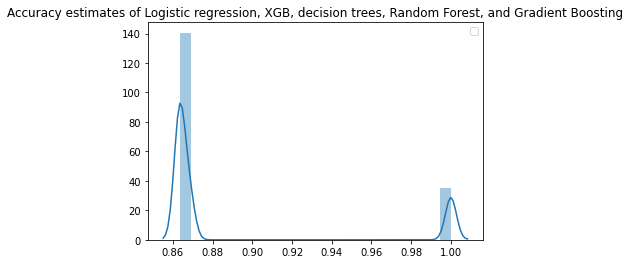

In [23]:
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.23, random_state = 5)

model_LR = LogisticRegression(max_iter=5000)
model_LR.fit(X_train, y_train)
LR_predict = model_LR.predict(X_test)
LR_score = model_LR.score(X_test,y_test)

model_X = XGBClassifier(eta=0.1, n_estimators=50,
                        max_depth=5, subsample=0.6, colsample_bytree=0.7,objective= 'binary:logistic',
                        scale_pos_weight=1, seed=27)
model_X.fit(X_train, y_train)
X_predict = model_X.predict(X_test)
X_score = model_X.score(X_test,y_test)

rfc = RandomForestClassifier(n_estimators=6)
rfc.fit(X_train, y_train)
RFC_predict = rfc.predict(X_test)
RFC_score = rfc.score(X_test,y_test)

model_DTC = DecisionTreeClassifier(max_depth=7, min_samples_leaf=6, min_samples_split=2)
model_DTC.fit(X_train, y_train)
DTC_predict = model_DTC.predict(X_test)
DTC_score = model_DTC.score(X_test,y_test)

model_GB = GradientBoostingClassifier(random_state=10, n_estimators=1500,min_samples_split=100, max_depth=6)
model_GB.fit(X, y)
GB_predict = model_GB.predict(X_test)
GB_score = model_GB.score(X_test,y_test)

x1=LR_score, X_score, RFC_score, DTC_score, GB_score
print(x1)

sns.distplot(a=x1, kde=True)
plt.legend()
plt.title('Accuracy estimates of Logistic regression, XGB, decision trees, Random Forest, and Gradient Boosting')

Let us use another algorithm called Naive bayes and now i have used cross validation scoring parameter

[0.77906977 0.76744186 0.8372093  0.75581395 0.83529412 0.76470588
 0.74117647 0.71764706]


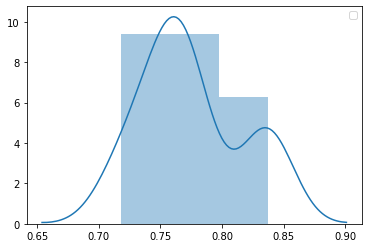

In [24]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score

gnb= GaussianNB()
gnb.fit(X_train, y_train)
prediction = gnb.predict(X_test)
cross_scores = cross_val_score(gnb,X_train,y_train,cv=8)
print(cross_scores)

sns.distplot(a=cross_scores, kde=True)
plt.legend()

KNeighbors in imported from sklearn library

In [25]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

neigh= KNeighborsClassifier(n_neighbors=5, leaf_size=30)
neigh.fit(X_train, y_train)
KN_predict = neigh.predict(X_test)
cross_scores = cross_val_score(neigh,X_train,y_train,cv=8)
print(cross_scores)
print(accuracy_score(KN_predict, y_test))

[0.52325581 0.53488372 0.63953488 0.65116279 0.67058824 0.63529412
 0.63529412 0.55294118]
0.6682926829268293


# Submission

In [26]:
predictions = model_X.predict(test_data)

output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('my_submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


Do comment on if any improvement could be done on this
I would be looking for more possible approaches like neural nets etc.
instead of mean i would look for pipelines and simpleimputer in future 

# References
1. https://www.kaggle.com/kshivi99/predcting-the-titanic-survivors-minimal-kernal
2. https://www.kaggle.com/mdmahmudferdous/titanic-survivor-prediction-0-804-top-8